# Population data for NYC, NYC counties, and Red Hook site

I took population data from the US Census using the American FactFinder portal in order to get population figures over time for NYC, its counties, and the Red Hook site (using the census tract values found in the geo_scope notebook - 53, 59, and 85). Other data sources had population figures for the years before 2010 or had estimates for each decade after 2000, but this seemed to be the best way to get population figures for each year.

In [7]:
import pandas as pd
import matplotlib.pylab as plt
import copy

In [2]:
def df_maker(sort):
    dfs = []
    for i in range(10,18):
        # Dataframe with raw data
        df = pd.read_csv('data/primary_source_data/census_pop/ACS_{}_5YR_B01003_with_ann.csv'.format(i), \
                         skiprows=1)
        # Make dictionary
        pop_dict = {'New York County': 0, 'Kings County': 0, 'Bronx County': 0, 'Queens County': 0, \
                    'Richmond County': 0, 'New York City Total': 0, 'Red Hook CTs': 0}
        # Get populations for each county and the whole city
        total_pop = 0
        for k, v in pop_dict.items():
            pop = df[df['Geography'].str.contains(k)]['Estimate; Total'].sum()
            pop_dict[k] = pop
            total_pop += pop
        pop_dict['New York City Total'] = total_pop

        # Get Red Hook populations
        rh_tracts = [' 53,', ' 59,', ' 85,']
        rh_pop = 0
        for tract in rh_tracts:
            tract_pop = df[(df['Geography'].str.contains(tract)) & (df['Geography'].str.contains('Kings'))]\
                ['Estimate; Total'].sum()
            rh_pop += tract_pop
        pop_dict['Red Hook CTs'] = rh_pop
        
        # Create a dataframe for all the populations
        pop_df = pd.DataFrame.from_dict(pop_dict, orient='index', columns=['20{}'.format(i)])
        pop_df.reset_index(level=0, inplace=True)
        pop_df.rename(columns={'index':'Geography'}, inplace=True)
        dfs.append(pop_df)
    
    combined_df = copy.deepcopy(dfs[0])
    for i in range(1, len(dfs)):
        combined_df = combined_df.merge(dfs[i], how='left', left_on='Geography', right_on='Geography')
        
    return combined_df

In [3]:
pop_df = df_maker(sort=False)
pop_df

,Geography,2010,2011,2012,2013,2014,2015,2016,2017
0,New York County,1583345,1588257,1596735,1605272,1618398,1629507,1634989,1653877
1,Kings County,2466782,2486119,2512740,2539789,2570801,2595259,2606852,2635121
2,Bronx County,1365725,1374593,1386364,1397315,1413566,1428357,1436785,1455846
3,Queens County,2199169,2213977,2235008,2256400,2280602,2301139,2310011,2339280
4,Richmond County,463450,466034,468374,470223,471522,472481,473324,475948
5,New York City Total,8078471,8128980,8199221,8268999,8354889,8426743,8461961,8560072
6,Red Hook CTs,10973,11374,10987,10670,10440,10768,11102,11316


In [4]:
# Transformation for merging in other notebooks
pop_df = pop_df.T.reset_index()
pop_df.columns = pop_df.iloc[0]
pop_df = pop_df.reindex(pop_df.index.drop(0))
pop_df.rename(columns={'Geography':'Year'}, inplace=True)
pop_df

,Year,New York County,Kings County,Bronx County,Queens County,Richmond County,New York City Total,Red Hook CTs
1,2010,1583345,2466782,1365725,2199169,463450,8078471,10973
2,2011,1588257,2486119,1374593,2213977,466034,8128980,11374
3,2012,1596735,2512740,1386364,2235008,468374,8199221,10987
4,2013,1605272,2539789,1397315,2256400,470223,8268999,10670
5,2014,1618398,2570801,1413566,2280602,471522,8354889,10440
6,2015,1629507,2595259,1428357,2301139,472481,8426743,10768
7,2016,1634989,2606852,1436785,2310011,473324,8461961,11102
8,2017,1653877,2635121,1455846,2339280,475948,8560072,11316


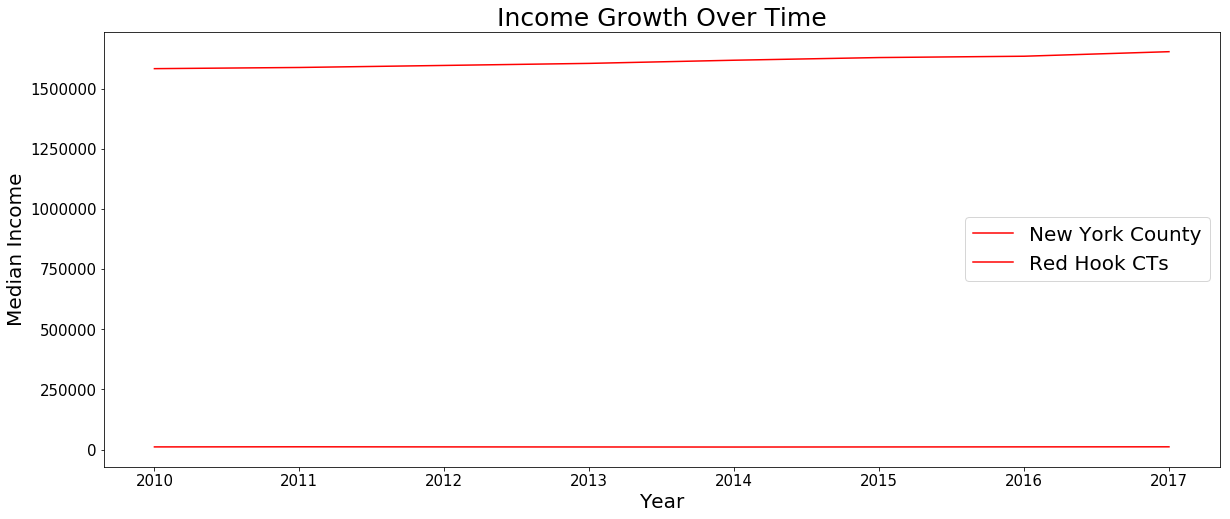

In [11]:
# Income comparison
plt.figure(figsize=(20,8))
plt.plot(pop_df['Year'], pop_df['New York County'], c='r', label='New York County')
plt.plot(pop_df['Year'], pop_df['Red Hook CTs'], c='r', label='Red Hook CTs')
plt.title("Income Growth Over Time", fontsize=25)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Median Income", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.show()

In [5]:
# Export to csv
# pop_df.to_csv('data/created_data/pop_time.csv', index=False)